In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [11]:
# Paths to the data files
abundance_file_path = 'species_abundance_filt.csv'
organism_subset_file_path = 'organism_data_to_subset.csv'

# Load both files
# species_abundance_filt.csv: This file contains abundance data for different species, 
# used to filter and visualize abundance patterns based on environmental variables such as soil pH.
# The column "taxon" in this file corresponds to "Species of interest" in organism_data_to_subset.csv,
# allowing the two datasets to be merged for visualization.
df_abundance = pd.read_csv(abundance_file_path)

# organism_data_to_subset.csv: This file contains information on environmental preferences for various species,
# such as soil pH preference. The column "Species of interest" in this file aligns with "taxon" in
# species_abundance_filt.csv, enabling filtering and visualization based on specific environmental preferences.
df_to_subset = pd.read_csv(organism_subset_file_path)



# Check Data Sizes

In [12]:
print(df_abundance.shape)
print(df_to_subset.shape)
unique_species_count = df_to_subset['Species of interest'].nunique()
print(unique_species_count)

(66210, 24)
(31815, 22)
18589


Duplicates in subset of organisms, need to remove

In [13]:
# Check for duplicates in the 'Species of interest' column
duplicates = df_to_subset[df_to_subset.duplicated(subset='Species of interest', keep=False)]
duplicate_species_names = duplicates['Species of interest'].unique()

# Print the names of duplicate species
print(duplicate_species_names)

['Shewanella putrefaciens' 'Myxococcus fulvus' 'Myxococcus xanthus' ...
 'Streptomyces sp. B3I8' 'Streptomyces sp. V2I9'
 'Streptomyces vilmorinianum']


# Remove Duplicates

In [14]:
# Remove Duplicate Species
df_to_subset = df_to_subset.drop_duplicates(subset='Species of interest')
df_to_subset.shape

(18589, 22)

# Merge Data

In [15]:
merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)


merged_data.shape


(66210, 46)

In [16]:
print(merged_data.columns)
top_species = merged_data.groupby('Species of interest').size().nlargest(10).reset_index(name='count')
top_species

Index(['Unnamed: 0', 'taxonomy_id_x', 'temperature_preference',
       'pH_preference', 'Species of interest', 'taxon_x', 'cultivatedCrops',
       'deciduousForest', 'dwarfScrub', 'emergentHerbaceousWetlands',
       'evergreenForest', 'grasslandHerbaceous', 'mixedForest', 'pastureHay',
       'sedgeHerbaceous', 'shrubScrub', 'woodyWetlands',
       'Metagenome-assembled genome?', 'GEM match criteria', 'GEM_ID',
       'Genome source', 'accession', 'name', 'taxonomy_id_y', 'percentage',
       'lineage', 'source', 'is_MAG', 'taxid_lineage', 'genomicsSampleID',
       'd15N', 'organicd13C', 'nitrogenPercent', 'organicCPercent', 'soilTemp',
       'soilMoisture', 'soilInWaterpH', 'soilInCaClpH', 'latitude',
       'longitude', 'elevation', 'sampleTiming', 'nlcdClass', 'db_name',
       'taxon_y', 'n_samples'],
      dtype='object')


,Species of interest,count
0,Deltaproteobacteria bacterium,1357
1,Verrucomicrobiaceae bacterium,1355
2,Hyphomicrobiaceae bacterium,1345
3,Methylobacterium oryzihabitans,1326
4,Nonomuraea sp. NEAU-A123,1321
5,Mycobacterium sp. 1245111.1,1310
6,uncultured Telmatospirillum sp.,1308
7,Bordetella genomosp. 9,1303
8,Chloroflexi bacterium OHK40,1302
9,Ramlibacter ginsenosidimutans,1300


In [17]:
species_name = ["Deltaproteobacteria bacterium", "Verrucomicrobiaceae bacterium", "Hyphomicrobiaceae bacterium", "Methylobacterium oryzihabitans", "Nonomuraea sp. NEAU-A123", "Mycobacterium sp. 1245111.1", "uncultured Telmatospirillum sp."]

# Filter for the target species
target_species = merged_data[merged_data['Species of interest'].isin(species_name)]



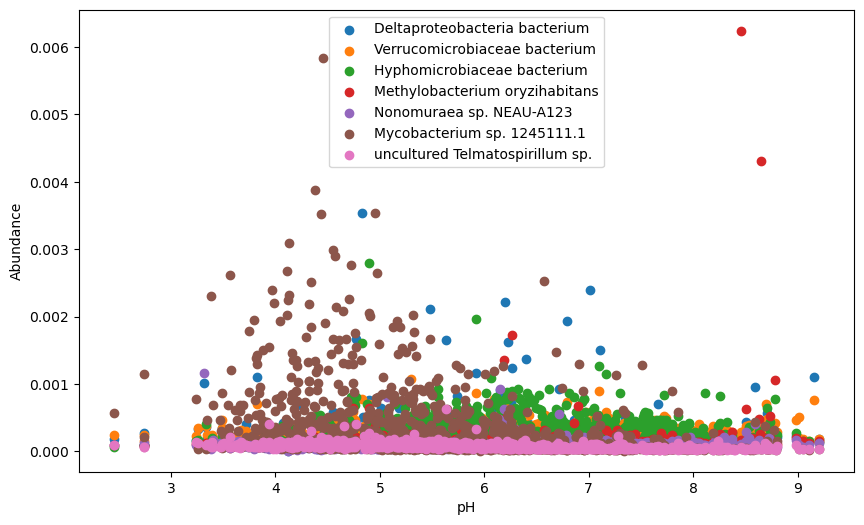

<Figure size 640x480 with 0 Axes>

In [18]:
# Plot the abundance of the top species
plt.figure(figsize=(10, 6))
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'], label=species)

plt.xlabel('pH')
plt.ylabel('Abundance')
plt.legend()
plt.show()
plt.savefig('abundance_vs_ph.png')

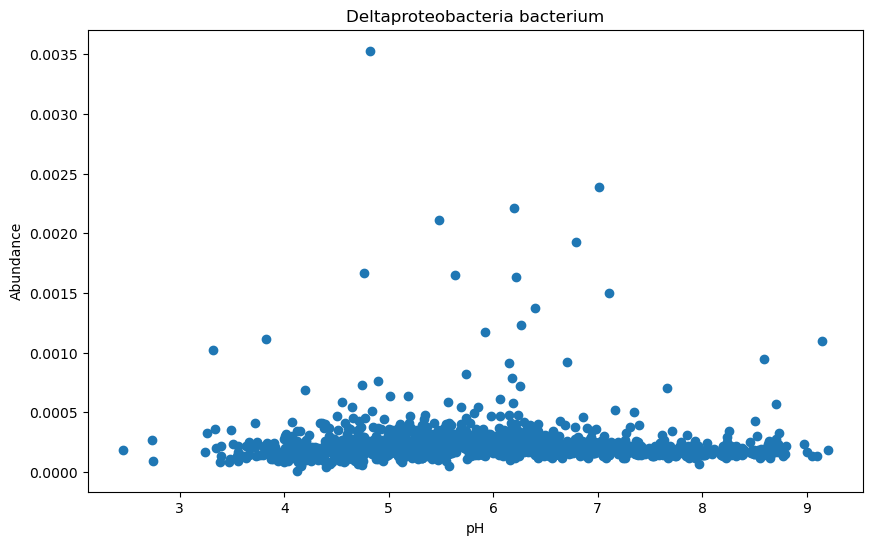

<Figure size 640x480 with 0 Axes>

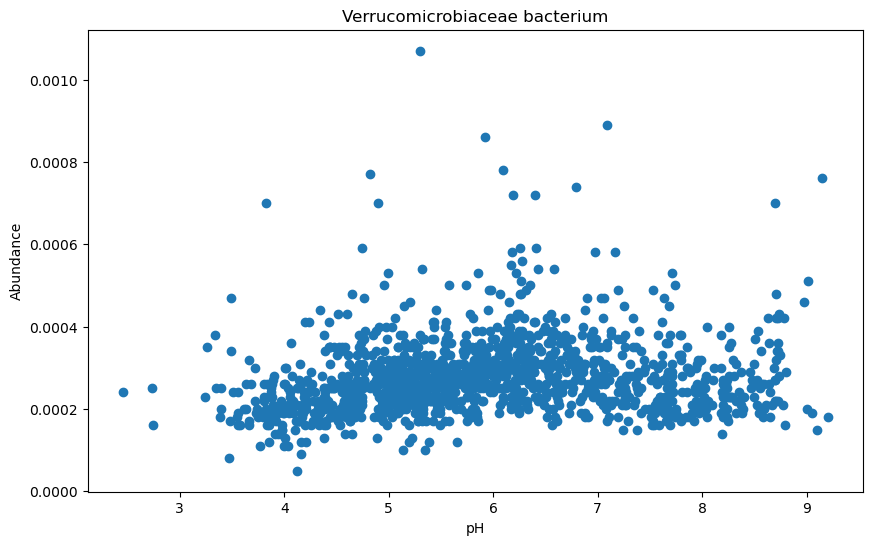

<Figure size 640x480 with 0 Axes>

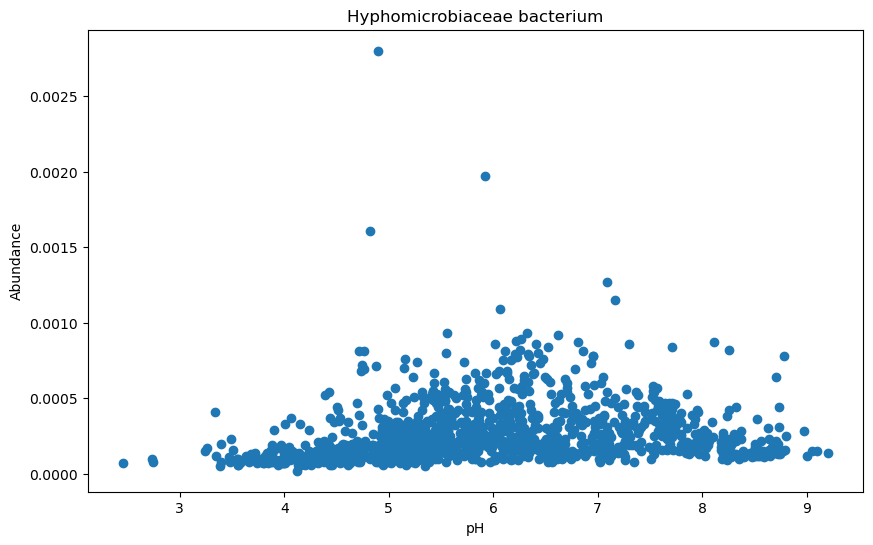

<Figure size 640x480 with 0 Axes>

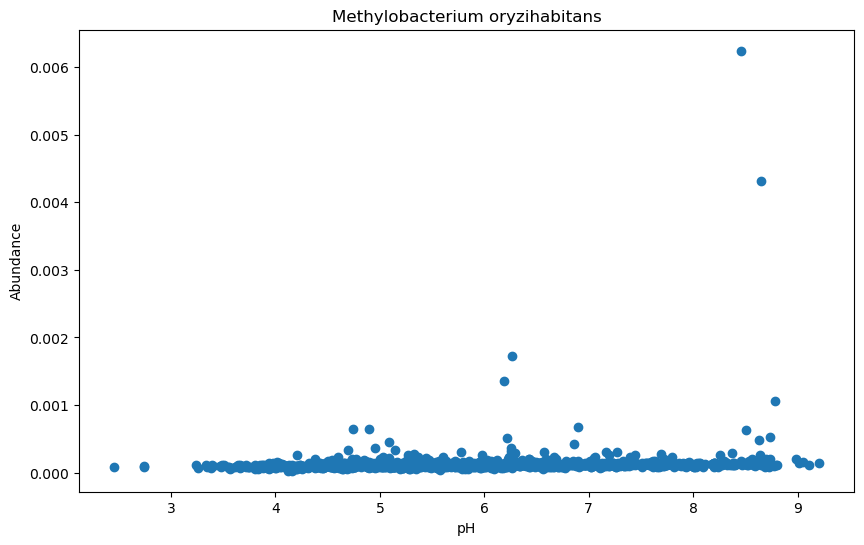

<Figure size 640x480 with 0 Axes>

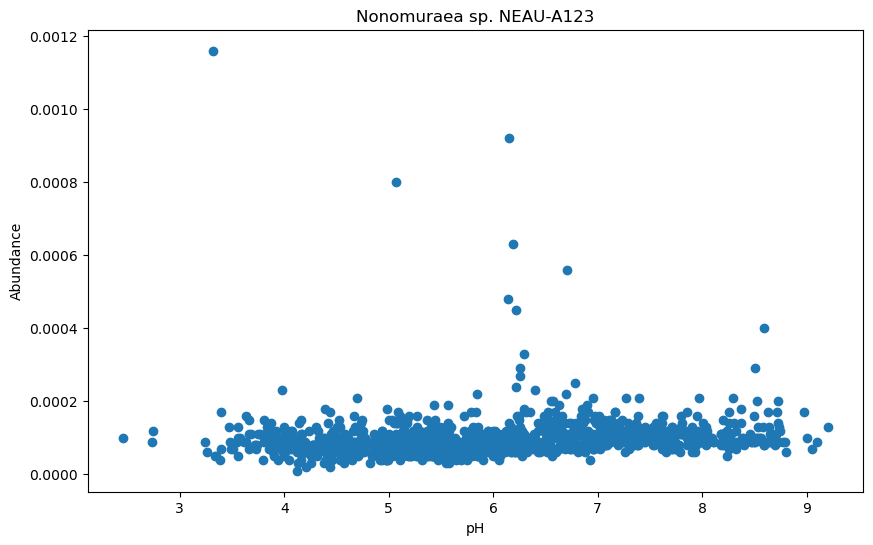

<Figure size 640x480 with 0 Axes>

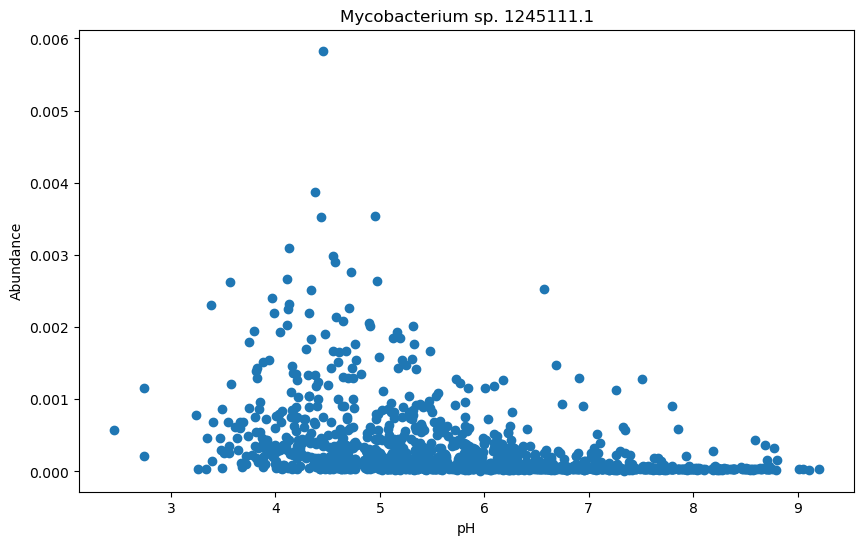

<Figure size 640x480 with 0 Axes>

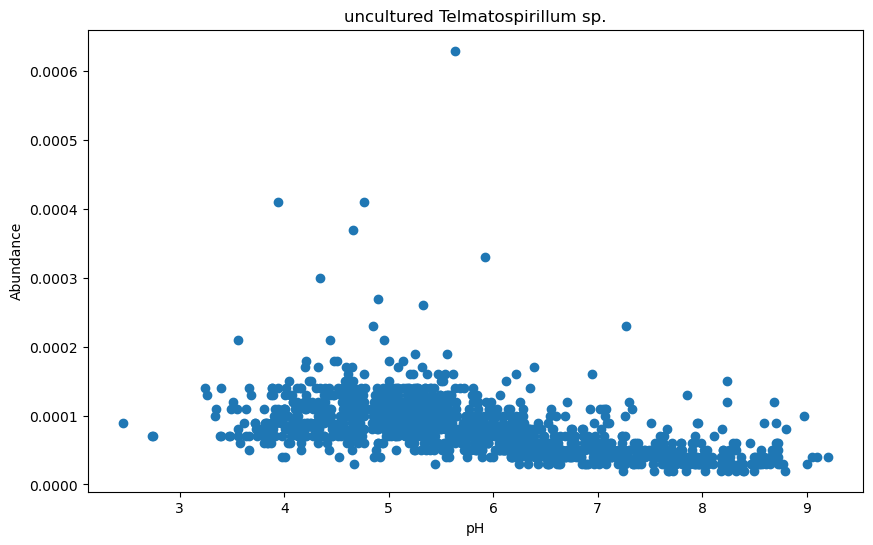

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot individually for each species
for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.figure(figsize=(10, 6))
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'])
    plt.xlabel('pH')
    plt.ylabel('Abundance')
    plt.title(species)
    plt.show()
    plt.savefig(f'abundance_vs_ph_{species}.png')

    

# Average Abundance vs Species Specific Abundance

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Paths to the data files
abundance_file_path = 'species_abundance_filt.csv'
organism_subset_file_path = 'organism_data_to_subset.csv'

# Load both files
# species_abundance_filt.csv: This file contains abundance data for different species, 
# used to filter and visualize abundance patterns based on environmental variables such as soil pH.
# The column "taxon" in this file corresponds to "Species of interest" in organism_data_to_subset.csv,
# allowing the two datasets to be merged for visualization.
df_abundance = pd.read_csv(abundance_file_path)

# organism_data_to_subset.csv: This file contains information on environmental preferences for various species,
# such as soil pH preference. The column "Species of interest" in this file aligns with "taxon" in
# species_abundance_filt.csv, enabling filtering and visualization based on specific environmental preferences.
df_to_subset = pd.read_csv(organism_subset_file_path)


In [21]:
df_to_subset = df_to_subset.drop_duplicates(subset='Species of interest')
print(df_to_subset.shape)

merged_data = pd.merge(
    df_to_subset, df_abundance, 
    left_on='Species of interest', right_on='name', 
    how='inner'
)


print(merged_data.shape)


(18589, 22)
(66210, 46)


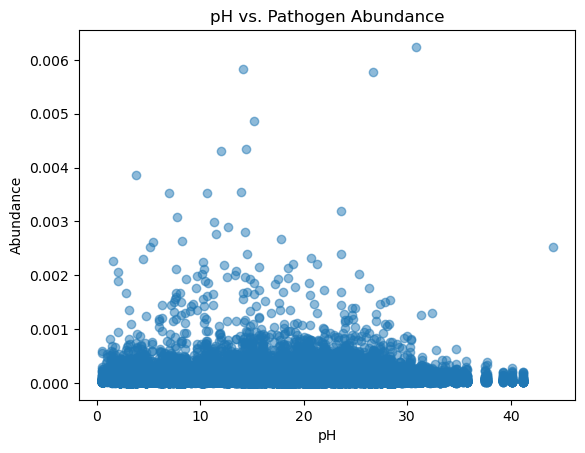

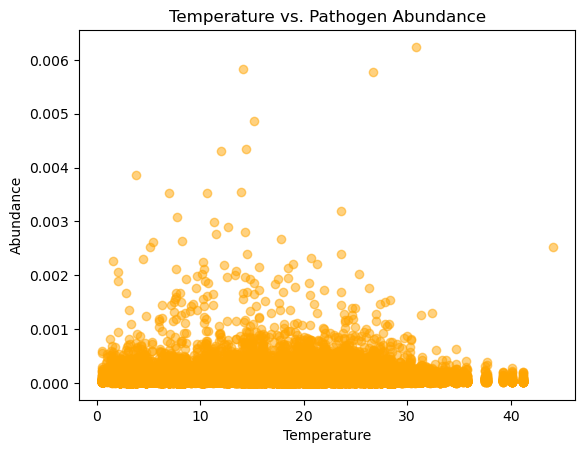

In [22]:
plt.scatter(merged_data['soilTemp'], merged_data['percentage'], alpha=0.5)
plt.xlabel('pH')
plt.ylabel('Abundance')
plt.title('pH vs. Pathogen Abundance')
plt.show()
# Scatter Plot (Temperature vs. Abundance)
# python
# Copy code
plt.scatter(merged_data['soilTemp'], merged_data['percentage'], alpha=0.5, color='orange')
plt.xlabel('Temperature')
plt.ylabel('Abundance')
plt.title('Temperature vs. Pathogen Abundance')
plt.show()

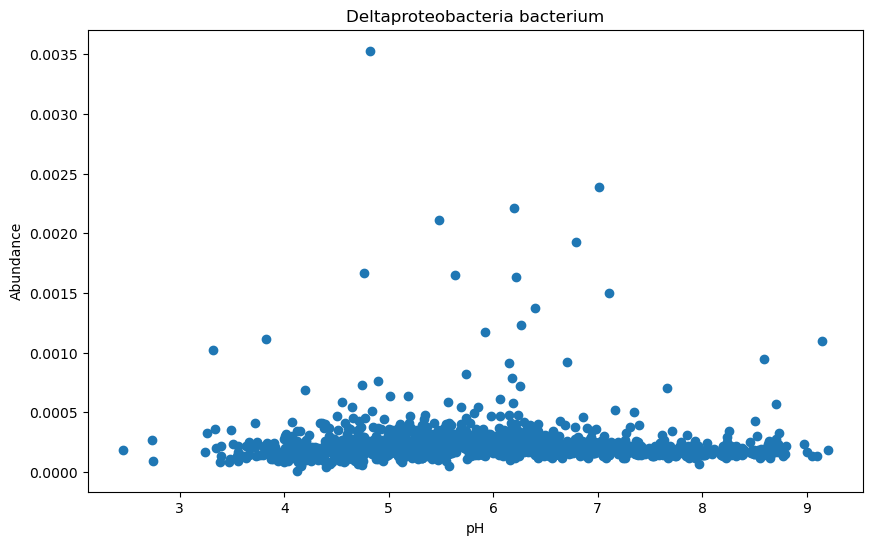

<Figure size 640x480 with 0 Axes>

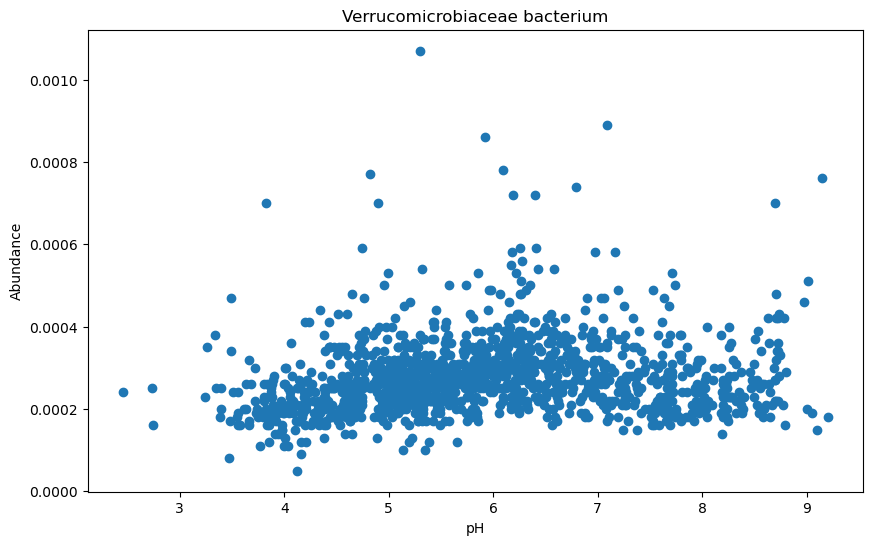

<Figure size 640x480 with 0 Axes>

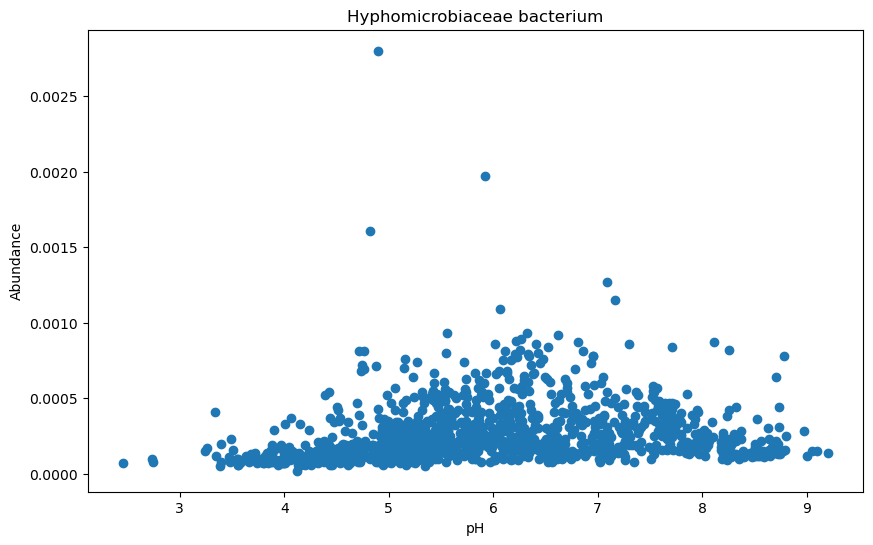

<Figure size 640x480 with 0 Axes>

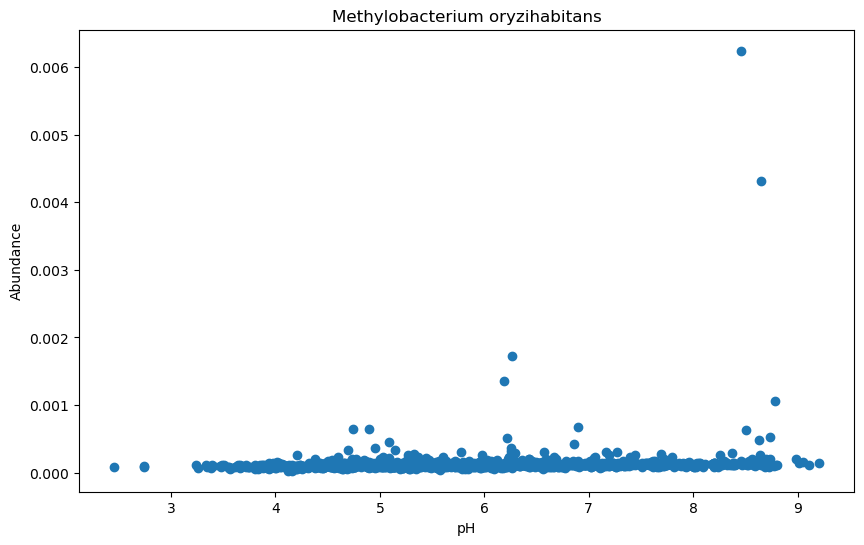

<Figure size 640x480 with 0 Axes>

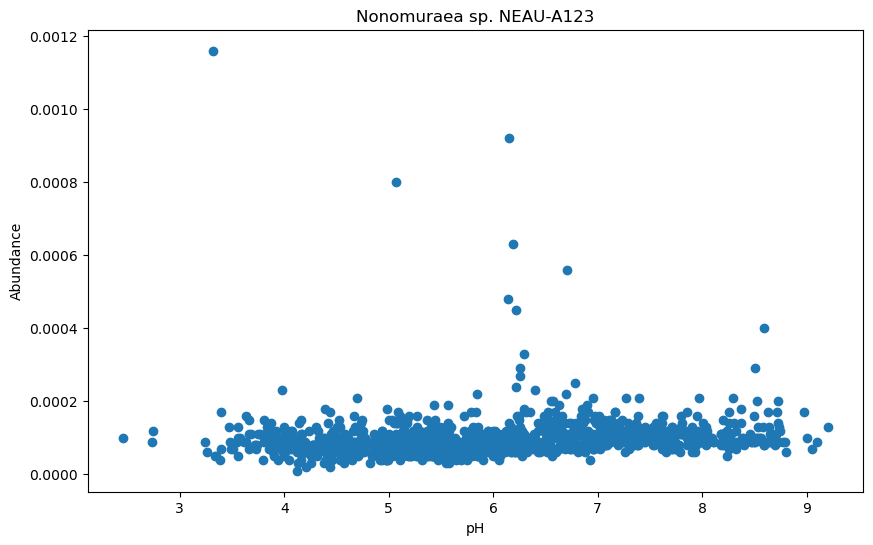

<Figure size 640x480 with 0 Axes>

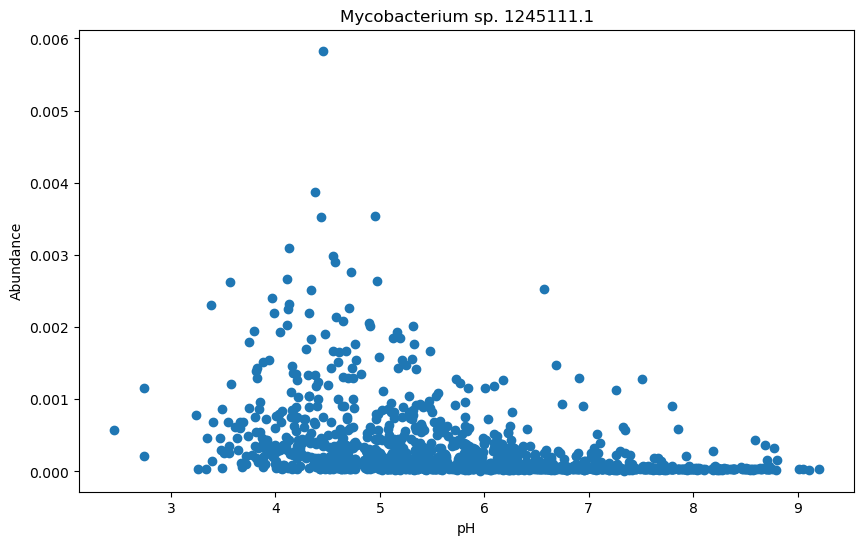

<Figure size 640x480 with 0 Axes>

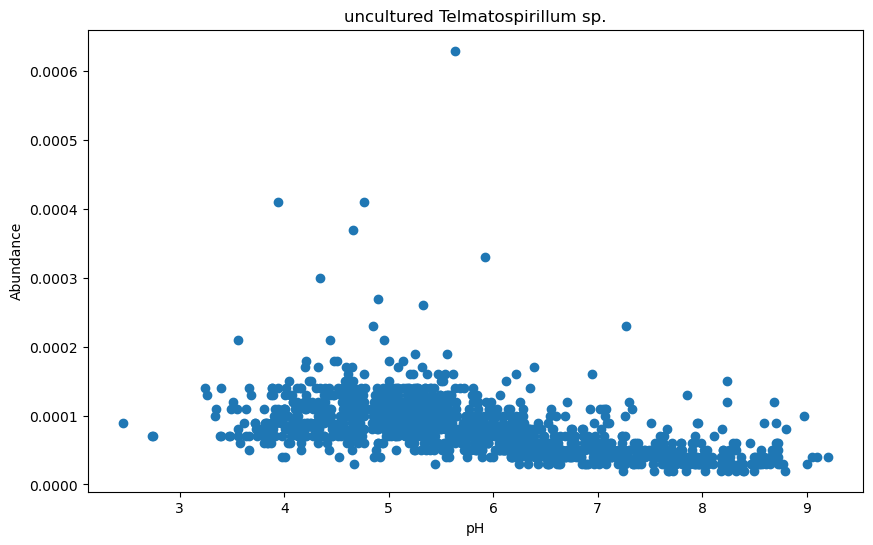

<Figure size 640x480 with 0 Axes>

In [23]:
species_name = ["Deltaproteobacteria bacterium", "Verrucomicrobiaceae bacterium", "Hyphomicrobiaceae bacterium", "Methylobacterium oryzihabitans", "Nonomuraea sp. NEAU-A123", "Mycobacterium sp. 1245111.1", "uncultured Telmatospirillum sp."]

# Filter for the target species
target_species = merged_data[merged_data['Species of interest'].isin(species_name)]

for species in species_name:
    species_data = target_species[target_species['Species of interest'] == species]
    plt.figure(figsize=(10, 6))
    plt.scatter(species_data['soilInWaterpH'], species_data['percentage'])
    plt.xlabel('pH')
    plt.ylabel('Abundance')
    plt.title(species)
    plt.show()
    plt.savefig(f'abundance_vs_ph_{species}.png')



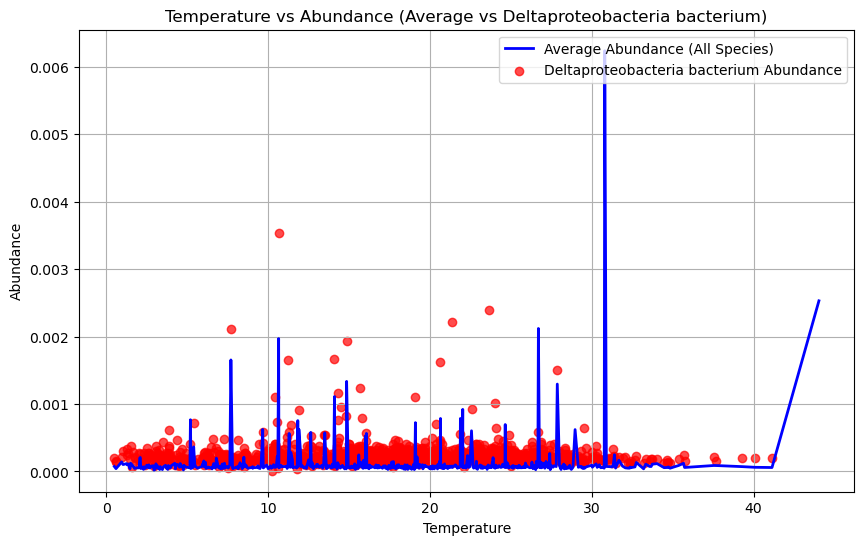

In [24]:
import matplotlib.pyplot as plt

# # Plot the average abundance data
# plt.scatter(merged_data['soilTemp'], merged_data['percentage'], alpha=0.5, label='Average Abundance', color='blue')
# plt.scatter(merged_data['soilpH'], merged_data['percentage'], alpha=0.5, label='Average Abundance (pH)', color='green')

# # Plot specific species data
# for species in target_species:
#     species_data = merged_data[merged_data['Species of interest'] == species]
#     plt.scatter(species_data['soilTemp'], species_data['percentage'], alpha=0.5, label=f'{species} (Temp)', color='orange')
#     plt.scatter(species_data['soilpH'], species_data['percentage'], alpha=0.5, label=f'{species} (pH)', color='red')

# # Customize the plot
# plt.xlabel('Temperature / pH')
# plt.ylabel('Abundance')
# plt.title('Average vs Specific Species Abundance')
# plt.legend()
# plt.show()
# Verify column names
import matplotlib.pyplot as plt

# Step 1: Calculate average abundance for all species grouped by temperature
average_abundance = merged_data.groupby('soilTemp')['percentage'].mean().reset_index()

# Step 2: Select one species
selected_species = "Deltaproteobacteria bacterium"  # Replace with any species from your list
species_data = merged_data[merged_data['Species of interest'] == selected_species]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Plot average abundance (calculated dynamically)
plt.plot(average_abundance['soilTemp'], average_abundance['percentage'], color='blue', label='Average Abundance (All Species)', linewidth=2)

# Plot the selected species abundance
plt.scatter(species_data['soilTemp'], species_data['percentage'], alpha=0.7, color='red', label=f'{selected_species} Abundance', marker='o')

# Customize the plot
plt.xlabel('Temperature')
plt.ylabel('Abundance')
plt.title(f'Temperature vs Abundance (Average vs {selected_species})')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



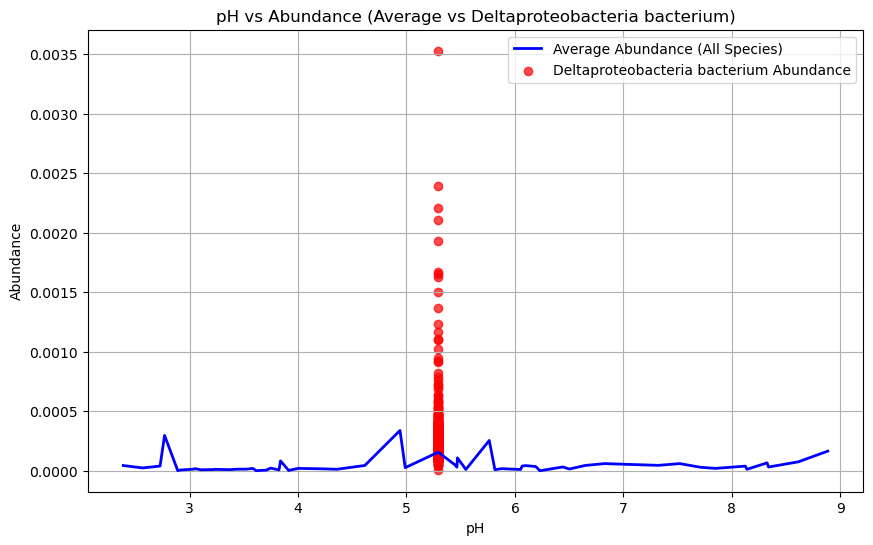

In [25]:
import matplotlib.pyplot as plt

# Step 1: Calculate average abundance for all species grouped by pH
average_abundance_pH = merged_data.groupby('pH_preference')['percentage'].mean().reset_index()

# Step 2: Select one species (same as before or a different one)
selected_species = "Deltaproteobacteria bacterium" # Replace with any species from your list
species_data_pH = merged_data[merged_data['Species of interest'] == selected_species]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Plot average abundance (calculated dynamically)
plt.plot(average_abundance_pH['pH_preference'], average_abundance_pH['percentage'], color='blue', label='Average Abundance (All Species)', linewidth=2)

# Plot the selected species abundance
plt.scatter(species_data_pH['pH_preference'], species_data_pH['percentage'], alpha=0.7, color='red', label=f'{selected_species} Abundance', marker='o')

# Customize the plot
plt.xlabel('pH')
plt.ylabel('Abundance')
plt.title(f'pH vs Abundance (Average vs {selected_species})')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# Multi Organism data plot

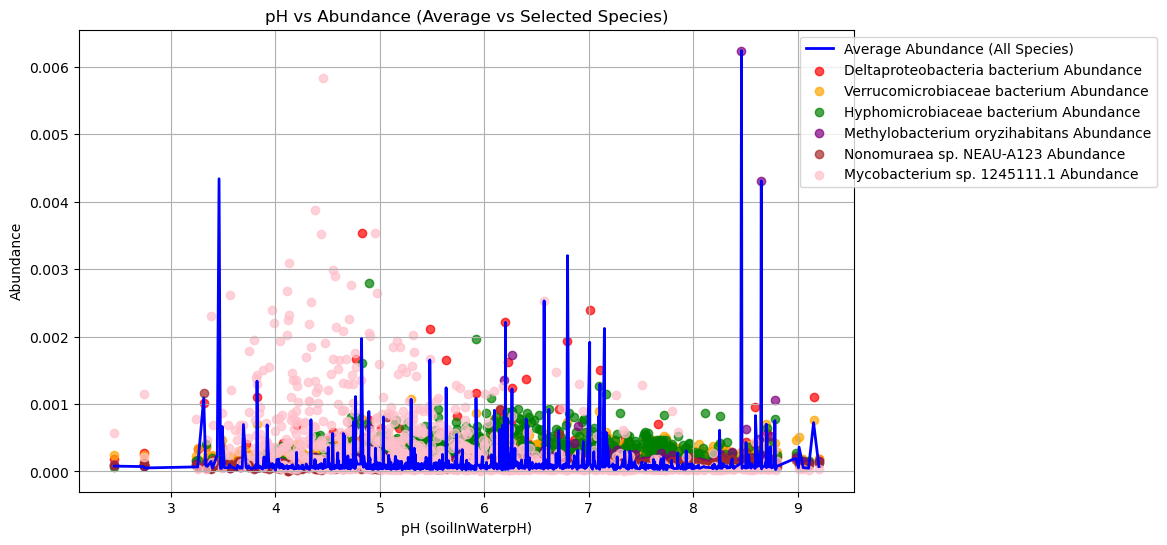

In [27]:
import matplotlib.pyplot as plt

# Step 1: Calculate average abundance for all species grouped by pH
average_abundance_pH = merged_data.groupby('soilInWaterpH')['percentage'].mean().reset_index()

# Step 2: Select organisms (including the existing one)
selected_species = [
    "Deltaproteobacteria bacterium",
    "Verrucomicrobiaceae bacterium",
    "Hyphomicrobiaceae bacterium",
    "Methylobacterium oryzihabitans",
    "Nonomuraea sp. NEAU-A123",
    "Mycobacterium sp. 1245111.1"
]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Plot average abundance (calculated dynamically)
plt.plot(average_abundance_pH['soilInWaterpH'], average_abundance_pH['percentage'], color='blue', label='Average Abundance (All Species)', linewidth=2)

# Plot abundance for each selected species
colors = ['red', 'orange', 'green', 'purple', 'brown', 'pink']  # Assign distinct colors for each species
for i, species in enumerate(selected_species):
    species_data_pH = merged_data[merged_data['Species of interest'] == species]
    plt.scatter(
        species_data_pH['soilInWaterpH'], species_data_pH['percentage'],
        alpha=0.7, color=colors[i], label=f'{species} Abundance', marker='o'
    )

# Customize the plot
plt.xlabel('pH (soilInWaterpH)')
plt.ylabel('Abundance')
plt.title('pH vs Abundance (Average vs Selected Species)')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))  # Adjust legend position for clarity
plt.grid(True)
plt.show()
